In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data = pd.read_csv('50_Startups.csv')

In [3]:
data

,R_DSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


C:\Users\anura\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


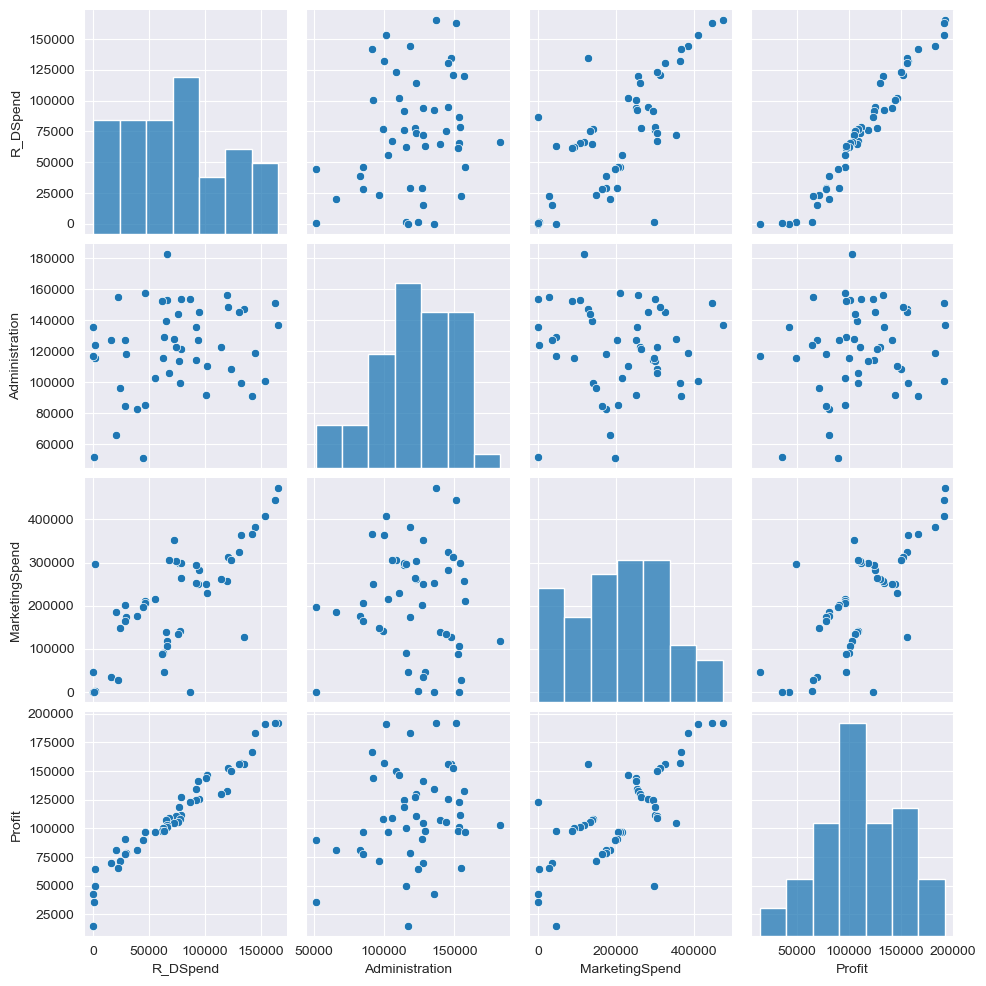

In [5]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [6]:
#preparing model
mod1=smf.ols('Profit~R_DSpend+Administration+MarketingSpend+State',data=data).fit()

In [7]:
#coefficients
mod1.params

Intercept            50125.343832
State[T.Florida]       198.788793
State[T.New York]      -41.887019
R_DSpend                 0.806023
Administration          -0.027004
MarketingSpend           0.026980
dtype: float64

In [8]:
#t and p-values
print(mod1.tvalues,'\n', mod1.pvalues)

Intercept             7.280560
State[T.Florida]      0.058970
State[T.New York]    -0.012864
R_DSpend             17.368580
Administration       -0.517012
MarketingSpend        1.573889
dtype: float64 
 Intercept            4.444178e-09
State[T.Florida]     9.532429e-01
State[T.New York]    9.897941e-01
R_DSpend             2.578772e-21
Administration       6.077373e-01
MarketingSpend       1.226769e-01
dtype: float64


In [9]:
#R squared values
(mod1.rsquared,mod1.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [10]:
#calculating VIF
rsq_R_DSpend = smf.ols('R_DSpend~Administration+MarketingSpend+State',data=data).fit().rsquared
vif_R_DSpend= 1/(rsq_R_DSpend)

In [11]:
vif_R_DSpend

1.6686678014787997

In [12]:
rsq_Administration = smf.ols('Administration~R_DSpend+MarketingSpend+State',data=data).fit().rsquared
vif_Administration= 1/(rsq_Administration)

In [13]:
vif_Administration

6.625371070238827

In [14]:
rsq_MarketingSpend = smf.ols('MarketingSpend~R_DSpend+Administration+State',data=data).fit().rsquared
vif_MarketingSpend= 1/(rsq_MarketingSpend)

In [15]:
vif_MarketingSpend

1.7058175389523065

In [16]:
d1= {'variables':['R_DSpend','Administration','MarketingSpend'], 'VIF':['vif_R_DSpend','vif_Administration','vif_MarketingSpend']}
vif_frame= pd.DataFrame(d1)
vif_frame

,variables,VIF
0,R_DSpend,vif_R_DSpend
1,Administration,vif_Administration
2,MarketingSpend,vif_MarketingSpend


In [17]:
#Detecting outliers

In [18]:
mod1_influence = mod1.get_influence()
(c,_) = mod1_influence.cooks_distance

In [19]:
#plot the influences value

Text(0, 0.5, 'Cooks Distance')

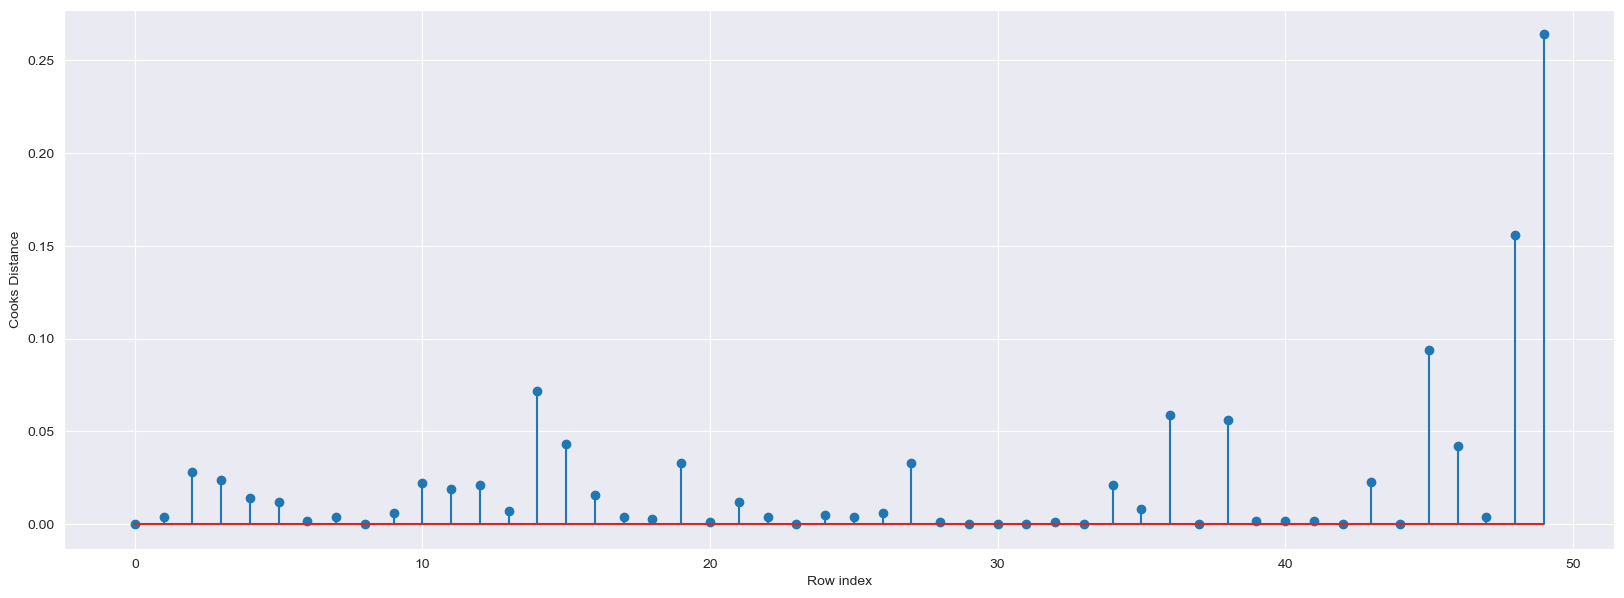

In [20]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')


In [21]:
(np.argmax(c),np.max(c))

(49, 0.2639594358712928)

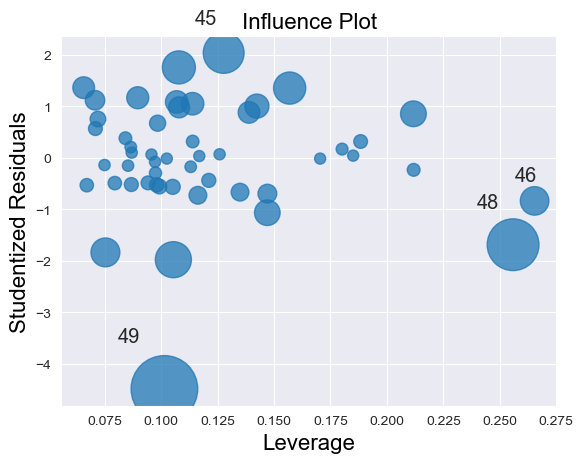

In [22]:
# High influence point
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(mod1)
plt.show()

In [25]:
k = data.shape[1]
n =data.shape[0]
leverage_cutoff = 3*((k+1))/n

In [26]:
leverage_cutoff

0.36

In [27]:
data[data.index.isin([48,49])]

,R_DSpend,Administration,MarketingSpend,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [28]:
# Improving the model

In [29]:
data_new = pd.read_csv('50_Startups.csv')

In [30]:
data1=data_new.drop(data_new.index[[48,49]],axis=0).reset_index()

In [31]:
data1=data1.drop(['index'],axis=1)

In [32]:
data1

,R_DSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [33]:
#build model

In [34]:
#exclude variable "Administration"
final_ml_v = smf.ols('Profit~R_DSpend+MarketingSpend+State',data = data1).fit()

In [35]:
(final_ml_v.rsquared,final_ml_v.aic)

(0.9611488413298318, 998.5947022159359)

In [36]:
#exclude variable "<arketingSpend"
final_ml_v = smf.ols('Profit~R_DSpend+Administration+State',data = data1).fit()

In [37]:
(final_ml_v.rsquared,final_ml_v.aic)

(0.961399737591967, 998.2837185686257)

In [38]:
#predicting for new data

In [39]:
new_data = pd.DataFrame({'R_DSpend':70000 ,'Administration':90000 ,'MarketingSpend':50000 ,'State': 'New York' },index=[1])

In [40]:
final_ml_v.predict(new_data)

1    112637.929367
dtype: float64

In [41]:
final_ml_v.predict(data_new.iloc[0:5,])

0    187253.934430
1    184281.039890
2    180387.836909
3    171498.771368
4    171867.160593
dtype: float64

# Toyota corolla


In [48]:
data1 = pd.read_csv('ToyotaCorolla.csv')

In [49]:
data1

,Id,Unnamed: 1,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,Totota,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

In [55]:
#preparing model
mod1=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data1).fit()

In [56]:
#coefficients
mod1.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [57]:
#t and p-values
print(mod1.tvalues,'\n', mod1.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [58]:
#R squared values
(mod1.rsquared,mod1.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

In [79]:
#calculating VIF
rsq_Age = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data1).fit().rsquared
vif_Age= 1/(rsq_Age)

In [80]:
vif_Age

2.130429133059701

In [81]:
rsq_KM = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data1).fit().rsquared
vif_KM= 1/(rsq_KM)

In [82]:
vif_KM

2.3211701508509974

In [83]:
rsq_HP= smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=data1).fit().rsquared
vif_HP= 1/(rsq_HP)

In [84]:
vif_MarketingSpend

1.7058175389523065

In [76]:
rsq_Doors = smf.ols('Doors~HP+Age_08_04+KM+cc+Gears+Quarterly_Tax+Weight',data=data1).fit().rsquared
vif_Doors= 1/(rsq_Doors)

In [77]:
vif_Doors

7.386707184837601

In [89]:
rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=data1).fit().rsquared
vif_cc= 1/(rsq_cc)

In [90]:
vif_cc

7.101505191612545

In [74]:
rsq_Gears = smf.ols('Gears~HP+Age_08_04+KM+cc+Doors+Quarterly_Tax+Weight',data=data1).fit().rsquared
vif_Gears=1/(rsq_MarketingSpend)

In [75]:
vif_Gears

1.7058175389523065

In [85]:
rsq_Quarterly_Tax = smf.ols('Quarterly_Tax~HP+Age_08_04+KM+cc+Doors+Gears+Weight',data=data1).fit().rsquared
vif_Quarterly_Tax= 1/(rsq_Quarterly_Tax)

In [86]:
vif_Quarterly_Tax

1.7625259306150842

In [87]:
rsq_Weight = smf.ols('Weight~HP+Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax',data=data1).fit().rsquared
vif_Weight= 1/(rsq_Weight)

In [88]:
vif_Weight

1.6594479808997462

In [92]:
d1= {'variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'], 'VIF':['vif_Age_08_04','vif_KM','vif_HP','vif_cc','vif_Doors','vif_Gears','vif_Quarterly_Tax','vif_Weight']}
vif_frame= pd.DataFrame(d1)
vif_frame

,variables,VIF
0,Age_08_04,vif_Age_08_04
1,KM,vif_KM
2,HP,vif_HP
3,cc,vif_cc
4,Doors,vif_Doors
5,Gears,vif_Gears
6,Quarterly_Tax,vif_Quarterly_Tax
7,Weight,vif_Weight


In [94]:
#detecting the outliers
mod1_influence = mod1.get_influence()
(c,_) = mod1_influence.cooks_distance

Text(0, 0.5, 'Cooks Distance')

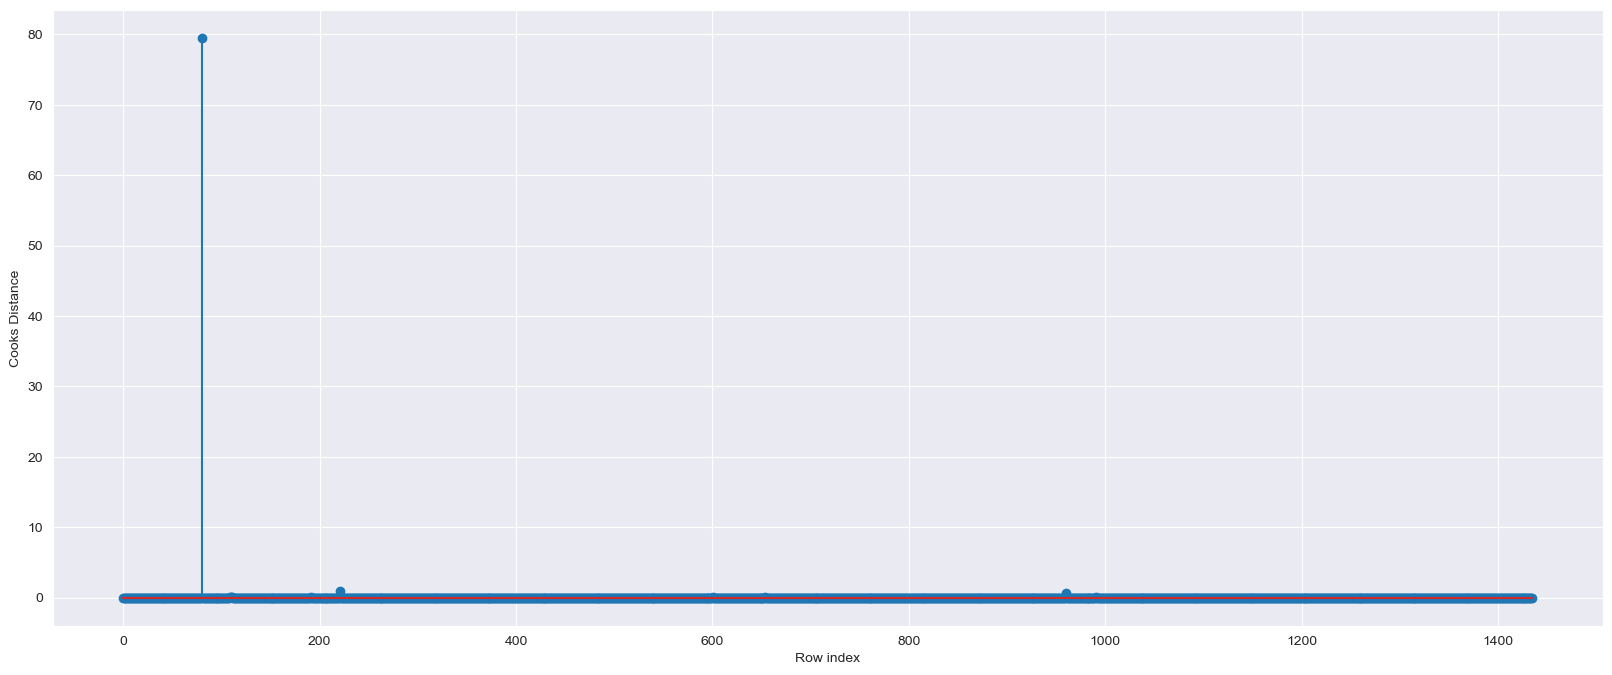

In [114]:
#plot the influence value
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(data1)),np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')


In [100]:
(np.argmax(c),np.max(c))

(80, 79.52010624137341)

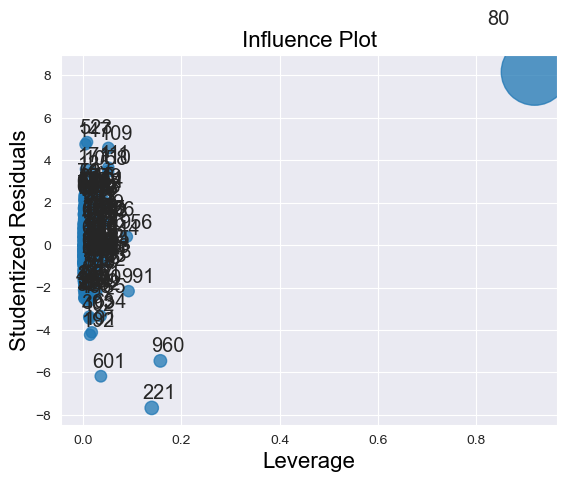

In [101]:
# High influence point
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(mod1)
plt.show()

In [103]:
k = data.shape[1]
n =data.shape[0]
leverage_cutoff = 3*((k+1))/n

In [104]:
leverage_cutoff 

0.36

In [116]:
data1[data1.index.isin([80,79.5])]

,Id,Unnamed: 1,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
80,81,TOYOTA Corolla 1.6 5drs 1 4/5-Doors,18950,25,8,2002,20019,Petrol,110,1,...,1,1,1,0,0,0,0,0,0,0


In [ ]:
#improving the model

In [117]:
data_new = pd.read_csv('ToyotaCorolla.csv')

In [119]:
data1=data_new.drop(data_new.index[[80,79]],axis=0).reset_index()

In [120]:
data1=data1.drop(['index'],axis=1)

In [137]:
#exclude variable "Doors"
final_m_v = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data = data1).fit()

In [138]:
(final_m_v.rsquared,final_ml_v.aic)

(0.8692433800620685, 24735.31262568683)

In [139]:
#exclude variable "cc"
final_m_v = smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data = data1).fit()

In [140]:
(final_m_v.rsquared,final_ml_v.aic)

(0.863078465721289, 24735.31262568683)

In [ ]:
#Predicting for the new model

In [141]:
new_data1 = pd.DataFrame({'Age_08_04' :50,'KM' : 40000,'HP': 80,'cc': 20000,'Doors':5,'Gears':5,'Quarterly_Tax':200,'Weight': 10000},index=[1])

In [142]:
final_m_v.predict(new_data1)

1    160748.689056
dtype: float64

In [143]:
final_m_v.predict(data_new.iloc[0:8,])

0    16821.405012
1    16278.403499
2    16810.080031
3    16435.089025
4    16230.498713
5    15516.307001
6    16672.942965
7    16699.606088
dtype: float64